In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
sys.path.append('..')
from os.path import join
from matplotlib import pyplot as plt
from collections import defaultdict
import pandas as pd
import os
import seaborn as sns
from tqdm import tqdm

In [2]:
# note: current best results are in oct17
save_dir = '/home/chansingh/mntv1/deep-fMRI/results/linear_models/oct23'
# save_dir = '/home/chansingh/mntv1/deep-fMRI/results/linear_models/subsamp_oct17'
dfs = []
fnames = [
    fname for fname in os.listdir(save_dir)[::-1]
    if not fname.startswith('coef')
]
for fname in tqdm(fnames):
    df = pd.read_pickle(join(save_dir, fname))
    # print(fname)
    # display(df)
    dfs.append(df.reset_index())
d = pd.concat(dfs)
# d = d.drop(columns='coef_')
# .round(2)
# d.set_index(['feats', 'dset'], inplace=True)
d

100%|██████████| 26/26 [00:09<00:00,  2.79it/s]


,feats,dset,acc_cv,acc,feats_dim,seed
0,glove__ndel=4fmri,tweet_eval,0.709877,0.692000,94619,3
0,glove__ndel=4fmri,tweet_eval,0.710617,0.689000,94619,2
0,bert-base-uncased,tweet_eval,0.776790,0.738000,768,1
0,bert-10__ndel=4fmri,tweet_eval,0.595185,0.573000,94619,3
0,bert-10__ndel=4fmri,tweet_eval,0.590617,0.578000,94619,1
0,glove__ndel=4fmri,trec,0.733183,0.834000,94610,2
0,bert-base-uncased,trec,0.848550,0.922000,768,1
0,bert-10__ndel=4fmri,trec,0.332652,0.382000,94648,3
0,bert-10__ndel=4fmri,trec,0.337137,0.378000,94648,1
0,glovevecs,sst2,0.849210,0.790138,300,1


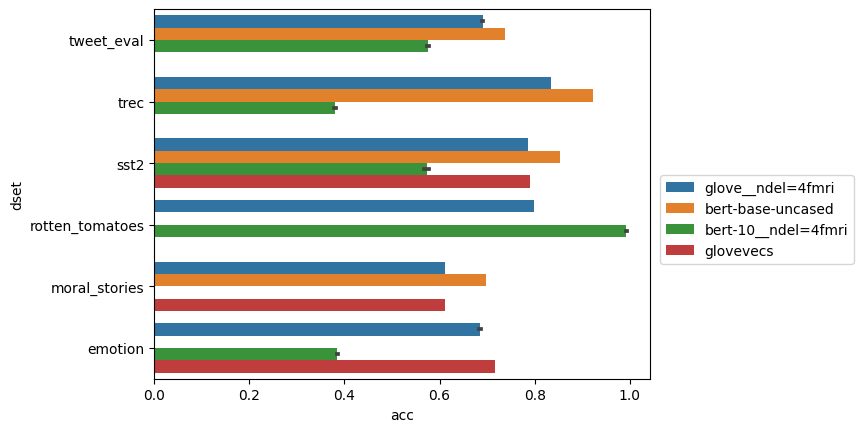

In [3]:
# sns.barplot(data=d, x='dset', y='acc', hue='feats')
sns.barplot(data=d, y='dset', x='acc', hue='model', orient='h')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.savefig('decoding_accs.pdf', bbox_inches='tight')